In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com//uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv")

IncompleteRead: IncompleteRead(18914767 bytes read, 28625983 more expected)

In [43]:
dataset=pd.read_csv("Uber.csv")

In [4]:
dataset.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01,40.2201,-74.0021,B02512
1,9/1/2014 0:01,40.7500,-74.0027,B02512
2,9/1/2014 0:03,40.7559,-73.9864,B02512
3,9/1/2014 0:06,40.7450,-73.9889,B02512
4,9/1/2014 0:11,40.8145,-73.9444,B02512


In [45]:
dataset.shape

(74315, 4)

In [12]:
dataset.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [44]:
dataset.dropna(inplace=True)

In [18]:
# selecting the feature require clustring latitude and longitude
# storing the different dataframe called clus
clus=dataset[['Lat','Lon']]
clus.dtypes

Lat    float64
Lon    float64
dtype: object

In [14]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(14)
kmeans.fit(clus)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=14, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

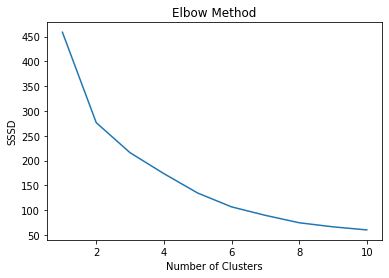

In [15]:
from sklearn.cluster import KMeans
sssd=  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(clus)
    sssd.append(kmeans.inertia_)
plt.plot(range(1,11), sssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSSD')
plt.show()


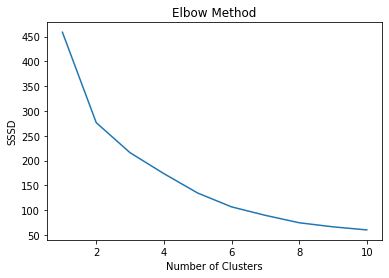

In [19]:
from sklearn.cluster import KMeans
sssd=  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(clus)
    sssd.append(kmeans.inertia_)
plt.plot(range(1,11), sssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSSD')
plt.show()

In [20]:
#From the above Elbow plot, we can see that the sum of the squared distance of the observations from their 
   #closest cluster centroid keeps decreasing with an increase in the number of clusters. 
#We can see that post K=5 there is a significant reduction. We can choose either 5 or 6 clusters. Selected 5 for this dataset.

In [21]:
kmeans = KMeans(n_clusters= 5, max_iter = 300, random_state = 12)
kmeans.fit(clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=12, tol=0.0001, verbose=0)

In [22]:
predict = kmeans.predict(clus)

In [23]:
clus['Cluster'] = predict

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
clus.head()

,Lat,Lon,Cluster
0,40.2201,-74.0021,0
1,40.7500,-74.0027,0
2,40.7559,-73.9864,2
3,40.7450,-73.9889,0
4,40.8145,-73.9444,2


In [25]:
#Storing Cluster centroid
centroids=kmeans.cluster_centers_
centroids
#For example, 40.72, -73.99 is the centroid for cluster 1 that is latitude and longitude value for centroid 1. 
#Similarly, we have centroids for other clusters.

array([[ 40.72087098, -73.99258033],
       [ 40.79027446, -73.8675701 ],
       [ 40.76525832, -73.97489643],
       [ 40.66793674, -73.74772015],
       [ 40.71575885, -74.20394083]])

In [26]:
colocation=pd.DataFrame(centroids,columns=['Lat','Lon'])
colocation

,Lat,Lon
0,40.720871,-73.992580
1,40.790274,-73.867570
2,40.765258,-73.974896
3,40.667937,-73.747720
4,40.715759,-74.203941


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


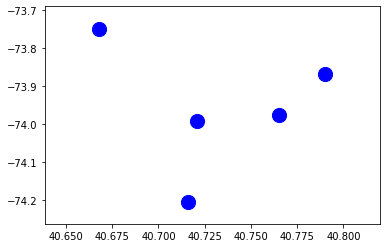

In [29]:
# Plotting all six centroids in scatter plot
plt.scatter(colocation['Lat'],colocation['Lon'],marker='o',color='B',s=200)
plt.show()

In [30]:
def generateBasemap(default_location=[40.796580 , -73.873417], default_zoom_start=12):
  base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
  return base_map

In [37]:
#!pip install folium

In [38]:
import folium

map_centroids = generateBasemap()

centro_tuples = tuple(map(tuple,centroids))
centro_list = list(centro_tuples)

In [39]:
for coord in centro_list:
  folium.CircleMarker(location=([coord[0], coord[1] ]), radius=10, color='darkblue').add_to(map_centroids)

In [40]:
map_centroids


In [41]:
clus.head()

,Lat,Lon,Cluster
0,40.2201,-74.0021,0
1,40.7500,-74.0027,0
2,40.7559,-73.9864,2
3,40.7450,-73.9889,0
4,40.8145,-73.9444,2


C:\Users\acer\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\acer\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


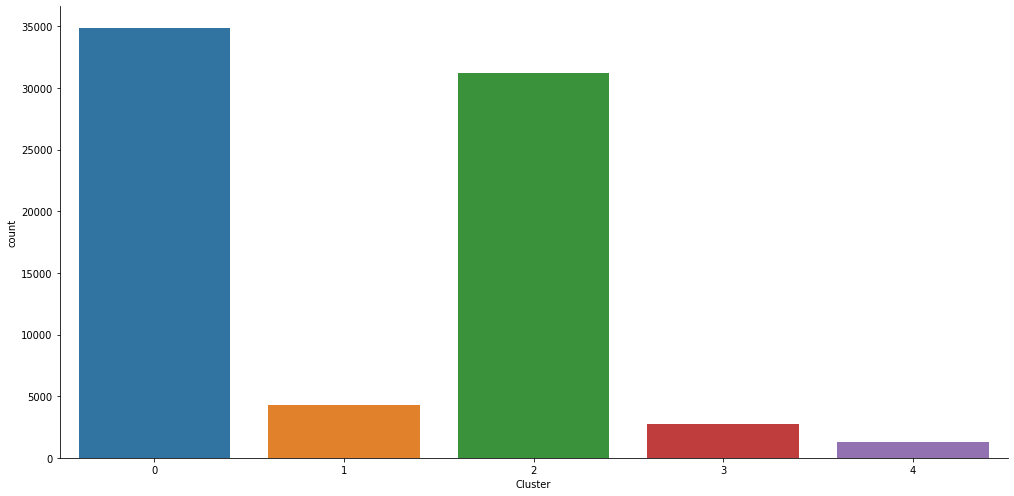

In [42]:
import seaborn as sns
sns.factorplot(data=clus,x='Cluster',kind='count',size=7,aspect=2)

In [52]:
kmeans = KMeans(n_clusters= 4, max_iter = 300, random_state = 11)
kmeans.fit(clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [53]:
predict = kmeans.predict(clus)

In [54]:
clus['Cluster'] = predict

In [58]:
clus["Cluster"].value_counts()

1    34875
0    31207
2     4254
3     3979
Name: Cluster, dtype: int64

In [56]:
#Storing Cluster centroid
centroids=kmeans.cluster_centers_
centroids
#For example, 40.72, -73.99 is the centroid for cluster 1 that is latitude and longitude value for centroid 1. 
#Similarly, we have centroids for other clusters.

array([[ 4.07651431e+01, -7.39749744e+01,  1.00000000e+00],
       [ 4.07207630e+01, -7.39925921e+01, -1.90514271e-13],
       [ 4.07903945e+01, -7.38676809e+01,  3.00000000e+00],
       [ 4.06829480e+01, -7.38909269e+01,  2.00000000e+00]])

In [51]:
colocation=pd.DataFrame(centroids,columns=['Lat','Lon'])
colocation

ValueError: Shape of passed values is (4, 3), indices imply (4, 2)